Algorytm przeszukiwania Tabu Paweł Brodziak Magdalena Leśniak Marceli Ptak

In [1]:
import random
import math
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generuj_rozwiazanie(miasta):
    return np.random.permutation(miasta)

In [3]:
def oblicz_calkowita_odleglosc(rozwiazanie):
    calkowita_odleglosc = 0
    for i in range(len(rozwiazanie)-1):
        calkowita_odleglosc +=instancja[rozwiazanie[i]][rozwiazanie[i+1]]
    return calkowita_odleglosc

In [4]:
def znajdz_sasiada(ob_rozwiazanie, ob_odleglosc):
    nowy_rekord_tabu = []
    nowa_odleglosc = int(sys.maxsize)
    nowe_rozwiazanie = None
    
    for i in range(len(rozwiazanie)):
        for j in range(i+1,len(rozwiazanie)):
            if i == j :
                continue;
            temp = np.copy(rozwiazanie)
            temp[i], temp[j] = temp[j], temp[i].copy()
            temp_odleglosc = oblicz_calkowita_odleglosc(temp)
                
            if temp_odleglosc < nowa_odleglosc:
                    if lista_tabu[i][j] > 0 and temp_odleglosc > ob_odleglosc:
                        continue
                    nowy_rekord_tabu = [i,j]
                    nowa_odleglosc = temp_odleglosc
                    nowe_rozwiazanie = temp
                    
    return nowe_rozwiazanie, nowa_odleglosc, nowy_rekord_tabu
                
                

In [5]:
instancja = pd.read_excel('TSP_127.xlsx')
instancja.drop(columns=instancja.columns[0], axis=1, inplace=True)
instancja = instancja.to_numpy()

rozwiazanie = generuj_rozwiazanie(len(instancja))
miasta = instancja.shape[0]
lista_tabu = np.zeros_like(instancja)
odleglosc = oblicz_calkowita_odleglosc(rozwiazanie)

czas_przebywania_na_liscie_tabu = 3
ilosc_rekordow_tabu = 50
iteracje_algorytmu = 6000

Wygenerowane rozwiązanie:  [106 110  70  28  78  74  17  79  45 120  91  16  67  36  20   1 103 113
 107   2  63  11  49 101   9 116  25  12 123  60  43  81 122  76  19  13
  15  72 111 126  27 117  64  23  34  33  55 104  59 121  84 118  50  80
  71  90  85 100  14 105  83  96  39   7   8  46  52  82  73  86  56  35
  51  22  69  32  37  29  65  47   5  97  26  48  62 112 102  93  57  88
  42  75  89   4  30 119  87  31 108  38   6  24  95 109  54  98  41  58
  66  53  99  92 115  77 125   3  40 114  10  61  21  68 124  94 127  44
  18]  :
Całkowita odległość:  607654.7430678912
Rozwiązanie końcowe:  [ 70  68  73  74  77  18  21  17  20  14  41  37  16  90 116  60  61  91
  62  59 119  63 102 101  83  80  27  26  38  25  33 122  28  42  39  79
  78  84  81 126  82 117  31  30  34  43  40  48 118  46  49  53  47  55
 104  86  85 110  67   8  19  23  24 114   7 105 106   6   9  11   3  10
 120  12  32  29  36  35  51  57  54  45  93 127 107 111 112  94 121  22
  76  75  69  96  88  87 1

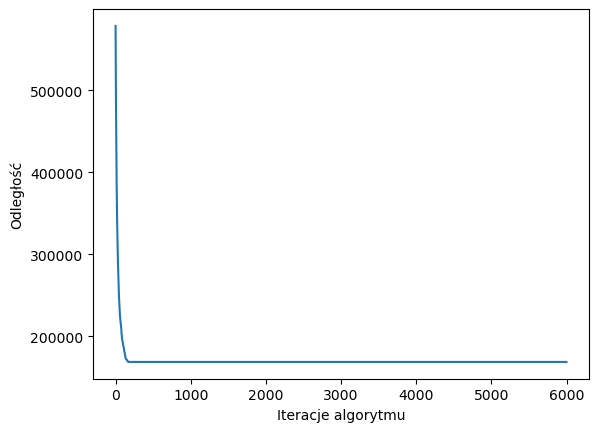

In [6]:
print("Wygenerowane rozwiązanie: ", rozwiazanie +1, " :")
print("Całkowita odległość: ", odleglosc)
lista_odleglosci = []
for x in range(iteracje_algorytmu):
    nowe_rozwiazanie, nowa_odleglosc, nowy_rekord_tabu = znajdz_sasiada(rozwiazanie, odleglosc)
    for iy, ix in np.ndindex(lista_tabu.shape):
        if lista_tabu[iy, ix] > 0:
            lista_tabu[iy, ix] -= 1
    lista_tabu[nowy_rekord_tabu[0],nowy_rekord_tabu[1]] = czas_przebywania_na_liscie_tabu
    if nowa_odleglosc < odleglosc:
            rozwiazanie = nowe_rozwiazanie
            odleglosc = nowa_odleglosc
    lista_odleglosci = np.append(lista_odleglosci, odleglosc)
    if np.count_nonzero(lista_tabu) == ilosc_rekordow_tabu:
        break
print("Rozwiązanie końcowe: ", rozwiazanie +1, " :")
print("Całkowita odległość: ", odleglosc)
plt.plot(lista_odleglosci)
plt.xlabel("Iteracje algorytmu")
plt.ylabel("Odległość")
plt.show()